# 1. Introduction
=================================================

Milestone 1 - Data Analytics

Nama  : Ghozy Reuski  
Batch : HCK-030

Program ini berisi proses untuk:

- Membersihkan dan mempersiapkan data employee attrition  
- Melakukan exploratory data analysis (EDA) dengan Python  
- Menyusun insight visual melalui dashboard interaktif menggunakan Tableau

=================================================

# 2. Problem Statement and Dataset Description

## Background

Attrition rates are rising in the R&D department at Zenith Corp, a mid-sized multinational firm operating in the tech and professional services sector. As the company heavily relies on R&D to drive innovation and sustain on development, the increasing turnover poses a serious threat to team stability and long-term performance.

In response, the HR department faces a challenge, identifying key drivers of attrition and implementing strategies to improve on employee retention. 


## SMART & Problem Statement

| *SMART Criteria* | *Description*                                                                                                                                                                                                                                                                  |
| ------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| *S (Specific)*   | Enhance employee’s retention rate by implementing data-driven solutions. |
| *M (Measurable)* | We are committed to increase employee retention rate by 2% per quarter.  |
| *A (Achievable)* | The intervention strategy will focus on data, analyzed from employee’s characteristics that are linked to attrition.                                    |
| *R (Relevant)*   | A higher retention rate leads to better team efficiency through experience, trust, and comfortability amongst workers. Moreover, with less employee turnover, the company can reduce spending on recruitment efforts. Ultimately increasing the company’s overall performance and HR department expenditure.                                           |
| *T (Time-bound)* |The goal is to increase retention rate from the current baseline of 83.88% up to 92% by the end of Q4.

Problem Statement: ZenithCorp currently faces an employee retention rate of 83.88%, with attrition affecting team efficiency, increasing recruitment costs, and placing pressure on HR resources. To address this, we aim to enhance employee retention through data-driven solutions derived from employee characteristics linked to attrition. The intervention strategy seeks to improve employee experience, trust, and team cohesion. Our commitment is to increase the retention rate by 2% each quarter, reaching 92% by the end of Q4. This improvement is expected to boost overall company performance while reducing HR-related expenditure.

Dataset: 

The dataset that I chose was from kaggle, titled "HR Analytics Dashboard" it was synthesized to simulate real life employee attrition patterns. It includes 1,470 employee records with fields related to demographics, job satisfaction, compensation, and career progression.

Link to dataset: https://www.kaggle.com/datasets/anubhav761/hr-analytics-dashboard-employee-attrition

# 3. Data Loading

In [1]:
#Imports:

import pandas as pd

""" Pandas is used for working with tabular data (DataFrames).
Commonly used for reading, cleaning, and analyzing datasets."""

import numpy as np

"""NumPy supports efficient numerical computations and array operations.
Useful for calculating statistical values like mean, median, etc."""

from scipy import stats

"""SciPy's stats module offers statistical tests and probability distributions.
Used for t-tests, correlation, normality tests, etc."""

import requests

"""Requests is used to send HTTP/HTTPS requests.
Ideal for web scraping or retrieving data from APIs."""

import openpyxl  

""" Enables reading and writing of Excel (.xlsx) files.
Required by pandas when using pd.read_excel() with modern Excel files."""

!pip install openpyxl

"""Installs the 'openpyxl' package. 
Only needed in Jupyter/Colab environments (the '!' runs a shell command)."""

import matplotlib.pyplot as plt
"""Matplotlib library, used to generate plots and graphs.
Can create line plots, bar charts, histograms, etc."""

import seaborn as sns
"""Statistical data visualization library built on top of Matplotlib.
Allows for clean and aesthetically pleasing plots (e.g., boxplots, heatmaps)."""

from IPython.core.display import display, HTML
""" Enableing display outputs (like formatted HTML) in Jupyter Notebooks.
Useful for customizing notebook output or embedding custom HTML/CSS."""

from scipy.stats import pointbiserialr, chi2_contingency

In [2]:
path = '/Users/kozigous/Downloads/archive/Cleaned_Employee_Data.xlsx'
df = pd.read_excel(path)

In [3]:
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df_employee = pd.read_excel(path, index_col=[9]) 
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,3,...,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,4,80,1,6,3,3,2,2,2,2


In [5]:
df_employee.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 4. Data cleaning

In [6]:
df_employee.rename(columns={'JobLevel': 'JobLevels'}, inplace=True)

In [7]:
education_map = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

ordinal_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
env_map = {
    1: 'Low',
    2: 'Medium',
    3: 'High',
    4: 'Very High'
}
JobLevel_map = {
    1: 'Entry Level',
    2: 'Intermediate',
    3: 'Experienced',
    4: 'Manager',
    5: 'Executive'
}
Attrition_map = {
    'Yes': 1,
    'No': 0
}

# Apply mappings to new columns
df_employee['EducationLevel'] = df_employee['Education'].map(education_map)
df_employee['EnvironmentSatisfactionLevel'] = df_employee['EnvironmentSatisfaction'].map(env_map)
df_employee['WorkLifeBalanceLevel'] = df_employee['WorkLifeBalance'].map(ordinal_map)
df_employee['RelationshipSatisfactionLevel'] = df_employee['RelationshipSatisfaction'].map(ordinal_map)
df_employee['JobSatisfactionLevel'] = df_employee['JobSatisfaction'].map(ordinal_map)
df_employee['JobInvolvementLevel'] = df_employee['JobInvolvement'].map(ordinal_map)
df_employee['PerformanceRatingLevel'] = df_employee['PerformanceRating'].map(ordinal_map)
df_employee['JobLevel'] = df_employee['JobLevels'].map(JobLevel_map)
df_employee['AttritionLevel'] = df_employee['Attrition'].map(Attrition_map)

# Drop old numeric columns
df_employee.drop(['Education', 'EnvironmentSatisfaction', 'WorkLifeBalance', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobInvolvement','PerformanceRating', 'JobLevels' ], axis=1, inplace=True)




In [8]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,EmployeeCount,Gender,HourlyRate,...,YearsWithCurrManager,EducationLevel,EnvironmentSatisfactionLevel,WorkLifeBalanceLevel,RelationshipSatisfactionLevel,JobSatisfactionLevel,JobInvolvementLevel,PerformanceRatingLevel,JobLevel,AttritionLevel
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,1,Female,94,...,5,College,Medium,Low,Low,Very High,High,High,Intermediate,1
2,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,1,Male,61,...,7,Below College,High,High,Very High,Medium,Medium,Very High,Intermediate,0
4,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,1,Male,92,...,0,College,Very High,High,Medium,High,Medium,High,Entry Level,1
5,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,1,Female,56,...,0,Master,Very High,High,High,High,High,High,Entry Level,0
7,27,No,Travel_Rarely,591,Research & Development,2,Medical,1,Male,40,...,2,Below College,Low,High,Very High,Medium,High,High,Entry Level,0


In [9]:
# drop columns that have a constant value or vag
df_employee.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)

In [10]:
df_employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,EducationField,Gender,HourlyRate,JobRole,...,YearsWithCurrManager,EducationLevel,EnvironmentSatisfactionLevel,WorkLifeBalanceLevel,RelationshipSatisfactionLevel,JobSatisfactionLevel,JobInvolvementLevel,PerformanceRatingLevel,JobLevel,AttritionLevel
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,1102,Sales,1,Life Sciences,Female,94,Sales Executive,...,5,College,Medium,Low,Low,Very High,High,High,Intermediate,1
2,49,No,Travel_Frequently,279,Research & Development,8,Life Sciences,Male,61,Research Scientist,...,7,Below College,High,High,Very High,Medium,Medium,Very High,Intermediate,0
4,37,Yes,Travel_Rarely,1373,Research & Development,2,Other,Male,92,Laboratory Technician,...,0,College,Very High,High,Medium,High,Medium,High,Entry Level,1
5,33,No,Travel_Frequently,1392,Research & Development,3,Life Sciences,Female,56,Research Scientist,...,0,Master,Very High,High,High,High,High,High,Entry Level,0
7,27,No,Travel_Rarely,591,Research & Development,2,Medical,Male,40,Laboratory Technician,...,2,Below College,Low,High,Very High,Medium,High,High,Entry Level,0


In [11]:
#exportdata
df_employee.to_csv('cleaned_employee_data.csv', index=False)

In [31]:
# Count and print total attrited
total_attrited = len(df_employee[df_employee['Attrition'] == 'Yes'])
print("There are", total_attrited, "employees who have attrited")

# Create a cumulative sum of 'Yes' values in Attrition column
df_employee['AttritionCount'] = df_employee['Attrition'].eq('Yes').cumsum()

# Export one single CSV file
df_employee.to_csv('cleaned_employee_data.csv', index=False)

There are 237 employees who have attrited


# 5. Exploration and Analysis

Preface: The data types in the dataset are categorized into two groups: categorical and continuous. In this case, I selected Attrition—-a binary variable—-as the benchmark. To analyze the relationship between each group and attrition, I used chi-squared correlation for categorical variables such as OverTime and EnvironmentSatisfactionLevel, and point biserial correlation for continuous variables such as DistanceFromHome and TotalWorkingYears.

#### Total attrition

In [ ]:
Attrited = df_employee[df_employee['Attrition'] == 'Yes']
print("There are", len(Attrited), "employees who have attrited")

There are 237 employees who have attrited


#### 1. What Are the Biggest Causes of Attrition?  

In [13]:
# create two separate columns based on data type
continuous_cols = [
    'Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome',
    'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',
    'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
    'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

categorical_cols = [
    'OverTime', 'JobRole', 'JobLevel', 'StockOptionLevel', 'MaritalStatus',
    'JobInvolvementLevel', 'BusinessTravel', 'EnvironmentSatisfactionLevel',
    'JobSatisfactionLevel', 'WorkLifeBalanceLevel', 'Department', 'EducationField',
    'RelationshipSatisfactionLevel', 'Gender', 'EducationLevel'
]

# Point biserial correlation for continuous variables
pb_results = []
for col in continuous_cols:
    corr, pval = pointbiserialr(df_employee['AttritionLevel'], df_employee[col])
    pb_results.append({
        'Variable': col,
        'Type': 'Continuous',
        'Association Strength': abs(corr),
        'Correlation': corr,
        'P-Value': pval
    })

pb_df = pd.DataFrame(pb_results)

# Cramer’s V for categorical variables
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

chi_results = []
for col in categorical_cols:
    table = pd.crosstab(df_employee[col], df_employee['Attrition'])
    v = cramers_v(table)
    chi2, p, _, _ = chi2_contingency(table)
    chi_results.append({
        'Variable': col,
        'Type': 'Categorical',
        'Association Strength': v,
        'Correlation': np.nan,
        'P-Value': p
    })

chi_df = pd.DataFrame(chi_results)

# Combine & filter significant results
combined_df = pd.concat([pb_df, chi_df], ignore_index=True)
sig_df = combined_df[combined_df['P-Value'] < 0.05].copy()

# format the output
sig_df['P-Value'] = sig_df['P-Value'].apply(lambda x: f"{x:.2e}")
sig_df['Association Strength'] = sig_df['Association Strength'].round(3)
sig_df['Correlation'] = sig_df['Correlation'].round(3)

# column order
final_table = sig_df[['Variable', 'Type', 'Correlation', 'Association Strength', 'P-Value']].sort_values(
    by='Association Strength', ascending=False
).reset_index(drop=True)

display(final_table)


,Variable,Type,Correlation,Association Strength,P-Value
0,OverTime,Categorical,NaN,0.244,8.16e-21
1,JobRole,Categorical,NaN,0.242,2.75e-15
2,JobLevel,Categorical,NaN,0.222,6.63e-15
3,StockOptionLevel,Categorical,NaN,0.203,4.38e-13
4,MaritalStatus,Categorical,NaN,0.177,9.46e-11
5,TotalWorkingYears,Continuous,-0.171,0.171,4.06e-11
6,YearsInCurrentRole,Continuous,-0.161,0.161,6.00e-10
7,MonthlyIncome,Continuous,-0.160,0.160,7.15e-10
8,Age,Continuous,-0.159,0.159,8.36e-10
9,YearsWithCurrManager,Continuous,-0.156,0.156,1.74e-09


In [42]:
final_table.to_csv("attrition_variable_analysis.csv", index=False)

Highlight:

Employee attrition at ZenithCorp is strongly influenced by factors related to employee satisfaction and tenure. Employees who work overtime or report low environment satisfaction are more likely to leave the company, indicating that dissatisfaction plays a key role in turnover. In contrast, those with longer tenure; measured by total working years, years in their current role, and their age(older) are less likely to leave, showing a negative correlation. This suggests that retaining experienced employees and improving workplace satisfaction could be effective strategies for reducing attrition.

#### 2. Of All Employees Who Left, How Many Were from Each OverTime Group?

In [14]:
# Only taking rows where employees are attrited
attrited = df_employee[df_employee['Attrition'] == 'Yes']

# Get proportion of attrition cases by OverTime
overtime_distribution = (
    attrited['OverTime']
    .value_counts(normalize=True) * 100
).reset_index()
overtime_distribution.columns = ['OverTime', 'Proportion of Attrition (%)']

print(overtime_distribution)

  OverTime  Proportion of Attrition (%)
0      Yes                    53.586498
1       No                    46.413502


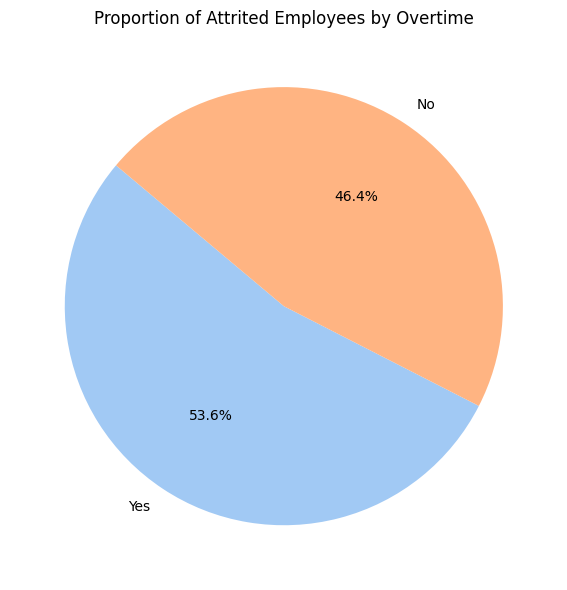

In [15]:
plt.figure(figsize=(6, 6))
plt.pie(
    overtime_distribution['Proportion of Attrition (%)'],
    labels=overtime_distribution['OverTime'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Proportion of Attrited Employees by Overtime')
plt.tight_layout()
plt.show()

Interpretation: To understand the relationship between OverTime and attrition, we analyze the distribution of overtime status of total employees who left the company. in this case, all employee's who attrited 53.6% did overtime

#### 3. Which Department Has the Highest Attrition Rate?

In [16]:
department_attrition = (
    df_employee.groupby('Department')['Attrition']
    .apply(lambda x: (x == 'Yes').mean() * 100)
    .reset_index(name='Attrition Rate (%)')
    .sort_values(by='Attrition Rate (%)', ascending=False)
)

print(department_attrition)

               Department  Attrition Rate (%)
2                   Sales           20.627803
0         Human Resources           19.047619
1  Research & Development           13.839750


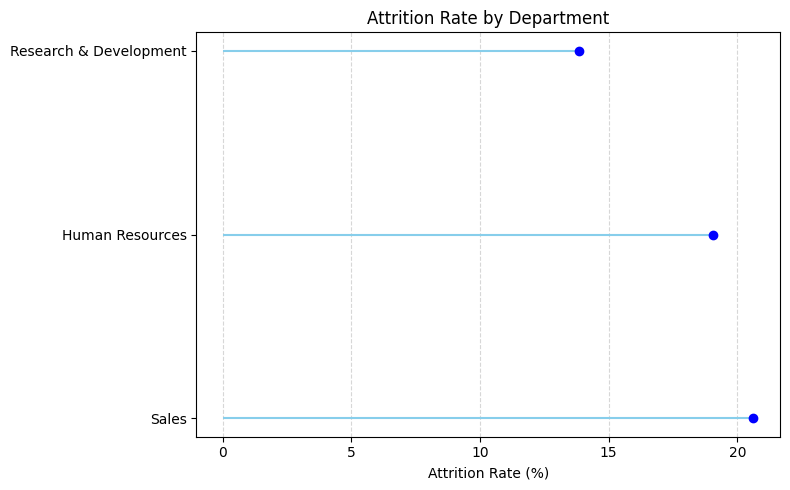

In [17]:
plt.figure(figsize=(8, 5))
plt.hlines(y=department_attrition['Department'], xmin=0, xmax=department_attrition['Attrition Rate (%)'], color='skyblue')
plt.plot(department_attrition['Attrition Rate (%)'], department_attrition['Department'], "o", color='blue')
plt.title('Attrition Rate by Department')
plt.xlabel('Attrition Rate (%)')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Interpretation: The department with the highest proportion of employees leaving the company, relative to its total headcount. A higher percentage of leavers in a department does not necessarily indicate a higher attrition risk.

#### 4. What Are the Attrition Rate and Count per Department?

This includes both:
- Attrition Rate (%): the percentage of employees who left within each department
- Attrition Count: the actual number of leavers per department

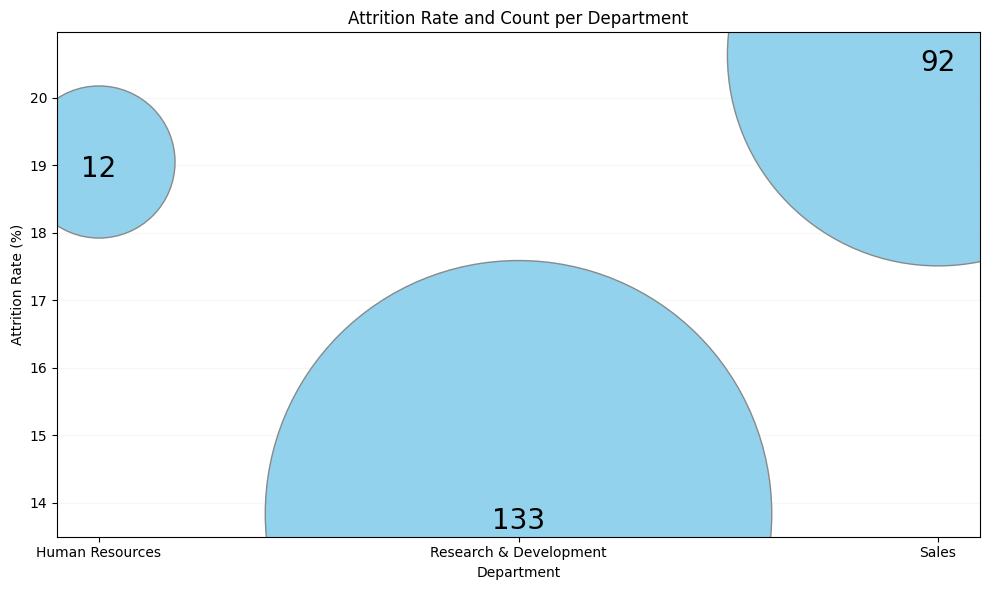

In [18]:
# Calculate overall percentage of attrition by department
department_stats = df_employee.groupby('Department').agg(
    Total=('Attrition', 'count'),
    Attrited=('Attrition', lambda x: (x == 'Yes').sum())
).reset_index()

department_stats['Attrition Rate (%)'] = (department_stats['Attrited'] / department_stats['Total']) * 100

# Bubble chart to highlight proportionality
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=department_stats['Department'],
    y=department_stats['Attrition Rate (%)'],
    s=department_stats['Attrited'] * 1000,  # Bubble size 
    color='skyblue',
    alpha=0.9, # Bubble opacity
    edgecolors='grey'
)

# Add labels to show attrited counts
for i, row in department_stats.iterrows():
    plt.text(row['Department'], row['Attrition Rate (%)'] + 0.1, f"{int(row['Attrited'])}", 
             ha='center', va='top', fontsize=20, color='black')

plt.title("Attrition Rate and Count per Department")
plt.xlabel("Department")
plt.ylabel("Attrition Rate (%)")
plt.grid(axis='y', linestyle='-', alpha=0.1) # line opacity
plt.tight_layout()
plt.show()


Interpretation: This bubble plot highlights the proportionality of attrited employees across departments, taking into account both the attrition rate and the total headcount of each department. which allows us to see both rate and volume simultaneously.   

#### 5.. Of All Attrited Employees, How Many Came from Each Department?

In [19]:
# Only take rows where Attrition is "Yes"
attrited = df_employee[df_employee['Attrition'] == 'Yes']

# Get proportion of attrition cases by OverTime
Department_distribution = (
    attrited['Department']
    .value_counts(normalize=True) * 100
).reset_index()
Department_distribution.columns = ['Department', 'Proportion of Attrition (%)']

print(Department_distribution)

               Department  Proportion of Attrition (%)
0  Research & Development                    56.118143
1                   Sales                    38.818565
2         Human Resources                     5.063291


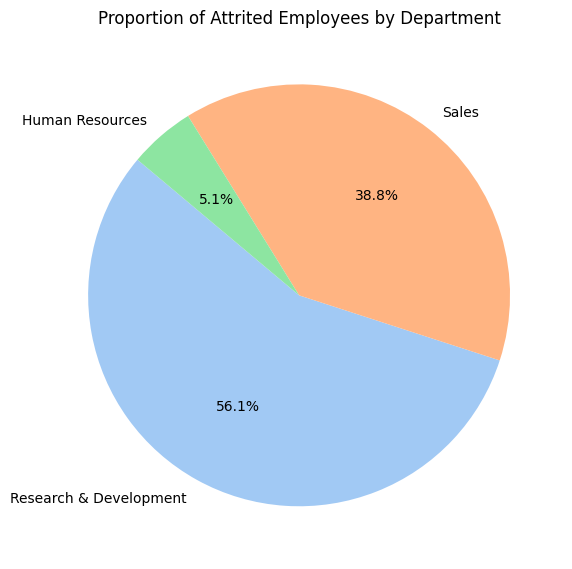

In [20]:
plt.figure(figsize=(6, 6))
plt.pie(
    Department_distribution['Proportion of Attrition (%)'],
    labels=Department_distribution['Department'],
    autopct='%1.1f%%',
    startangle=140,
    colors=sns.color_palette('pastel')
)
plt.title('Proportion of Attrited Employees by Department')
plt.tight_layout()
plt.show()

Interpretation: Despite having the lowest attrition rate among all departments at 13.8%, the R&D division accounts for the highest number of employees who left, totaling 133, which is more than ten times the number in the HR department. Given that ZenithCorp relies heavily on its R&D division for core operations, even modest attrition percentage poses a substantial risk. Therefore, it is most sensible to identify the R&D division as a strategic retention priority. Low attrition rate does not account for proportionality. in fact, out of all employee who attrited, a whopping 56.1% was from the R&D division.

#### 6. Do Younger Employees Have a Higher Probability of Leaving

In [21]:

col = 'Age'
corr, pval = pointbiserialr(df_employee["AttritionLevel"], df_employee[col])
results = {col: {"correlation": corr, "p-value": pval}}

print(results)


{'Age': {'correlation': -0.15920500686578196, 'p-value': 8.356308021098199e-10}}


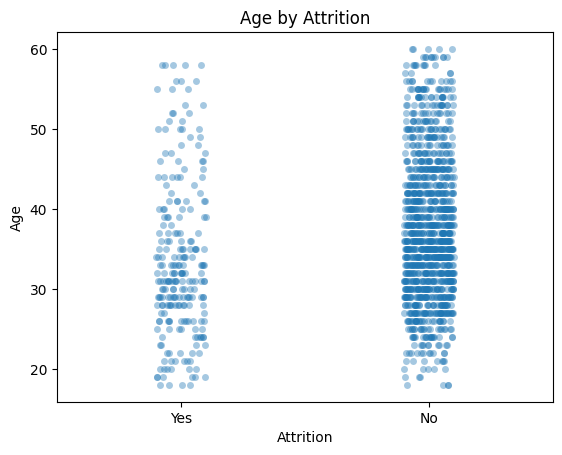

In [22]:
col = 'Age'

sns.stripplot(x='Attrition', y=col, data=df_employee, jitter=True, alpha=0.4)
plt.title(f'{col} by Attrition')
plt.show()

Interpretation: Based on the result (correlation = −0.159, p-value < 0.001), we reject the null hypothesis (H₀) that there is no relationship between age and attrition. The statistically significant negative correlation suggests that younger employees are more likely to leave the company, supporting the hypothesis that experience, as proxied by age, contributes to employee retention. However, the scatterplot indicates that the number of younger employees who left and who stayed is relatively balanced. The correlation appears to be driven more by the stronger retention among older employees, rather than a disproportionately high attrition among the younger generation.



#### 7. What Are the Most Important Protective Factors Against Attrition? 

In [23]:
# list of numerical columns
numerical_cols = [
    "Age", "DailyRate", "DistanceFromHome", "HourlyRate",
    "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked",
    "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear",
    "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion",
    "YearsWithCurrManager"
]

# dictionary to store results
results = {}

# point biserial correlation
for col in numerical_cols:
    corr, pval = pointbiserialr(df_employee['AttritionLevel'], df_employee[col])
    results[col] = {"correlation": corr, "p-value": pval}

# convert to DataFrame
results_df = pd.DataFrame(results).T

# Filtering to only show negative correlation and p-value < 0.05
protective_factors = results_df[
    (results_df["correlation"] < 0) & (results_df["p-value"] < 0.05)
].sort_values(by="correlation")

display(protective_factors)


,correlation,p-value
TotalWorkingYears,-0.171063,4.061878e-11
YearsInCurrentRole,-0.160545,6.003186e-10
MonthlyIncome,-0.159840,7.147364e-10
Age,-0.159205,8.356308e-10
YearsWithCurrManager,-0.156199,1.736987e-09
YearsAtCompany,-0.134392,2.318872e-07
TrainingTimesLastYear,-0.059478,2.257850e-02
DailyRate,-0.056652,2.985816e-02


Interpretation: The data reinforces the notion that tenure and familiarity are strong protective factors against attrition. Total working experience (r = −0.171, p < 0.001), duration in current role (r = −0.161, p < 0.001), and years with the current manager (r = −0.156, p < 0.001) all show significant negative correlations with attrition, indicating that the longer an employee stays and builds familiarity within their role and team, the more likely they are to remain. Similarly, higher monthly income (r = −0.160, p < 0.001) and older age (r = −0.159, p < 0.001) are associated with greater retention. Collectively, these factors suggest that cultivating long-term relationships and providing growth within the company are key strategies for improving retention.

#### 8. Which department has the lowest level of environment satisfaction

In [24]:
# Only take rows where Attrition is 'Yes'
Attrited = df_employee[df_employee['AttritionLevel'] == 1]

# Group by Department and EnvironmentSatisfactionLevel, count and normalize

env_by_dept = (
    Attrited.groupby(['Department', 'EnvironmentSatisfactionLevel'])
    .size()
    .groupby(level=0, group_keys=False)
    .apply(lambda x: 100 * x / x.sum())  # convert to percentage
    .reset_index(name='Percentage')
)
# Show the table
print(env_by_dept)


                Department EnvironmentSatisfactionLevel  Percentage
0          Human Resources                         High   16.666667
1          Human Resources                          Low   33.333333
2          Human Resources                       Medium   25.000000
3          Human Resources                    Very High   25.000000
4   Research & Development                         High   28.571429
5   Research & Development                          Low   32.330827
6   Research & Development                       Medium   13.533835
7   Research & Development                    Very High   25.563910
8                    Sales                         High   23.913043
9                    Sales                          Low   27.173913
10                   Sales                       Medium   23.913043
11                   Sales                    Very High   25.000000


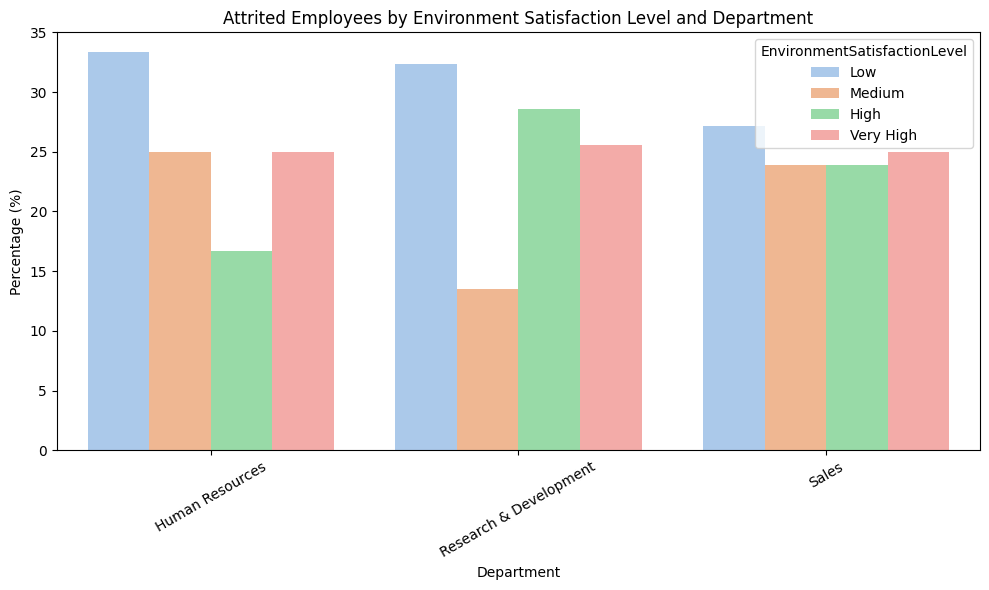

In [25]:
# So that the y-axis is ordered by ['Low', 'Medium', 'High', 'Very High']
category_order = ['Low', 'Medium', 'High', 'Very High']

    
env_by_dept['EnvironmentSatisfactionLevel'] = pd.Categorical(env_by_dept['EnvironmentSatisfactionLevel'], categories=category_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=env_by_dept,
    x='Department',
    y='Percentage',
    hue='EnvironmentSatisfactionLevel',
    palette='pastel'
)
plt.title('Attrited Employees by Environment Satisfaction Level and Department')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


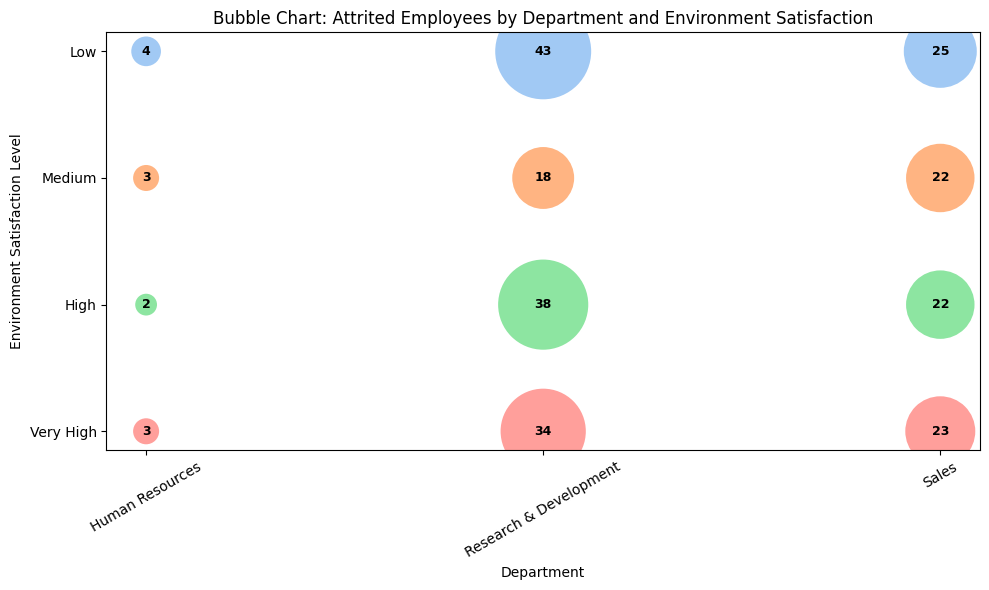

In [26]:
# Filter to only show attrited employees
attrited = df_employee[df_employee['Attrition'] == 'Yes']

# Count attrited employees per Department and EnvironmentSatisfactionLevel
env_by_dept = (
    attrited.groupby(['Department', 'EnvironmentSatisfactionLevel'])
    .size()
    .reset_index(name='Count')
)

# Order categories for the y-axis
category_order = ['Low', 'Medium', 'High', 'Very High']
env_by_dept['EnvironmentSatisfactionLevel'] = pd.Categorical(
    env_by_dept['EnvironmentSatisfactionLevel'],
    categories=category_order,
    ordered=True
)

# Bubble plot using employee counts for size
plt.figure(figsize=(10, 6))
bubble_plot = sns.scatterplot(
    data=env_by_dept,
    x='Department',
    y='EnvironmentSatisfactionLevel',
    size='Count',                         
    hue='EnvironmentSatisfactionLevel',   
    palette='pastel',
    sizes=(300, 5000),
    legend=False
)

# Add annotations 
for i in range(env_by_dept.shape[0]):
    x = env_by_dept['Department'].iloc[i]
    y = env_by_dept['EnvironmentSatisfactionLevel'].iloc[i]
    count = env_by_dept['Count'].iloc[i]
    plt.text(x=x, y=y, s=str(count), ha='center', va='center', fontsize=9, fontweight='bold', color='black')

plt.title('Bubble Chart: Attrited Employees by Department and Environment Satisfaction')
plt.xlabel('Department')
plt.ylabel('Environment Satisfaction Level')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Interpretation: Even though R&D has the lowest attrition rate, it contributes the largest number of dissatisfied leavers. Therefore, it should still be considered a priority for retention interventions, especially focusing on improving environment satisfaction.

# 6. Conclusion


Taking everything into account, across the board, attrition rate is broadly influenced by tenure and employee satisfaction. Given that the R&D department is the backbone of the company and it contributes the highest number of leavers, it should be identified as an Attrition risk, and become the vocal point of retention efforts. Statistics findings suggest that, in order to combat attrition-- particularly, in the R&D division-- two interventions needs to be implemented, a shake-up of the work environment to better support employees, and reducing overtime demands. These measures are expected to snowball to a rising retention rate, twhich in turn will increase total working years, foster stronger collaboration, and familiarity.  These outcomes are closely associated with the most effective protective factors against attrition.
